In [ ]:
#Importar librerias
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

In [ ]:
!mv kaggle.json /content/kaggle.json

mv: 'kaggle.json' and '/content/kaggle.json' are the same file


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia

udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip udea*.zip > /dev/null

replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
!ls -lash *.csv

4.5M -rw-r--r-- 1 root root 4.5M Mar 25 16:54 submission_example.csv
 57M -rw-r--r-- 1 root root  57M Mar 25 16:54 test.csv
138M -rw-r--r-- 1 root root 138M Mar 25 16:54 train.csv


Cargar datos train.csv con pandas

In [ ]:
z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)


shape of loaded dataframe (692500, 21)


In [ ]:
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


Información general

In [ ]:
z.isna().sum()

,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_TIENELAVADORA,39773


In [ ]:
z.dtypes

,0
ID,int64
PERIODO,int64
ESTU_PRGM_ACADEMICO,object
ESTU_PRGM_DEPARTAMENTO,object
ESTU_VALORMATRICULAUNIVERSIDAD,object
ESTU_HORASSEMANATRABAJA,object
FAMI_ESTRATOVIVIENDA,object
FAMI_TIENEINTERNET,object
FAMI_EDUCACIONPADRE,object
FAMI_TIENELAVADORA,object


### Preprocesamiento de la columna `Periodo`

La columna `Periodo` representa el momento en que el estudiante presentó la prueba Saber Pro. Por ejemplo:

- `20211` significa **año 2021**, **semestre 1**
- `20222` significa **año 2022**, **semestre 2**

Hay dos formas comunes de procesar esta variable:

1. **Tratarla como una etiqueta categórica (one-hot encoding)**:
   - Convierte cada valor en una columna diferente.
   - Puede funcionar bien si solo queremos predecir sobre los periodos ya conocidos.
   - Sin embargo, el modelo **no podría generalizar** si aparece un periodo nuevo (como `20231`).
   - Además, puede llevar a **sobreajuste**, es decir, que el modelo solo funcione bien con los datos de entrenamiento pero falle con nuevos.

2. **Separar `Periodo` en dos columnas: `AÑO` y `SEMESTRE`**:
   - Permite que el modelo **aprenda relaciones temporales**.
   - Mejora la capacidad de generalización hacia periodos futuros.
   - Es más útil para predicciones reales donde se espera aplicar el modelo a nuevas cohortes.

Por esta razón, se recomienda **dividir `Periodo` en `AÑO` y `SEMESTRE` como variables numéricas** para que el modelo pueda aprender mejor el comportamiento a lo largo del tiempo.


In [ ]:
sorted(z.PERIODO.unique())

[np.int64(20183),
 np.int64(20184),
 np.int64(20194),
 np.int64(20195),
 np.int64(20196),
 np.int64(20202),
 np.int64(20203),
 np.int64(20212),
 np.int64(20213)]

### Tratamiento de la columna `Periodo`: Eliminación

Una vez que hemos separado la columna `Periodo` en dos nuevas columnas numéricas (`AÑO` y `SEMESTRE`), ya **no es necesario conservar la columna original `Periodo`**, pues su información está contenida en las nuevas variables.

Por eso, procedemos a eliminarla del conjunto de datos para evitar redundancia.

In [ ]:
z = z.drop(columns=['PERIODO'])

In [ ]:
z.head()

,ID,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


### Tratamiento de la columna `ESTU_PRGM_ACADEMICO` (Programa Académico)

La columna contiene una gran cantidad de programas académicos (alta cardinalidad), lo que hace poco práctico aplicar one-hot encoding directamente.

En lugar de eso, se agruparán los programas por categorías temáticas generales, como:

- Ingenierías
- Licenciaturas
- Ciencias de la Salud
- Ciencias Exactas
- Ciencias Sociales, entre otras.

Esto permite reducir la complejidad del modelo y conservar la información relevante de formación académica.

También se pueden agrupar programas con nombres muy similares usando medidas de similitud textual.


In [ ]:
len(sorted(z.ESTU_PRGM_ACADEMICO.unique()))

948

In [ ]:
len(z.ESTU_PRGM_ACADEMICO.unique())

948

## Tratamiento de columna categórica
**Procesos aplicados**:
- Limpieza y normalización de texto (minúsculas, sin acentos ni caracteres especiales)
- Reducción de ruido: eliminación de números y símbolos
- Homogeneización de etiquetas similares mediante distancia de edición (Levenshtein)
- Agrupamiento de entradas equivalentes (`same`) y similares (`similar`)


In [ ]:
import re

In [ ]:
#Función para limpiar los datos, eliminando acentos y caracteres especiales y convirtiéndolos a minúsculas
def sanitize(text: str):
    accentA = re.compile(r'[áàâãä]'), 'a'
    accentE = re.compile(r'[éèêë]'), 'e'
    accentI = re.compile(r'[íìîï]'), 'i'
    accentO = re.compile(r'[óòôõö]'), 'o'
    accentU = re.compile(r'[úùûü]'), 'u'
    ampersand = re.compile(r'&'), 'y'

    removeSimbols = lambda text: ''.join(re.split(r'[,.:;[\]{}()?¿!¡°\'\"\n_-]', text))
    removeNumbers = lambda text: re.sub(r'\d', '', text)

    removeDoubleSpaces = lambda text: re.sub(r'  ', ' ', text)
    removeBeginSpaces = lambda text: re.sub(r'^\s', '', text)
    accentsToNormal = lambda accent, text: re.sub(accent[0], accent[1], text)
    removeKeywords = lambda keywords, text: re.sub(r'|'.join(keywords), '', text)

    text = text.lower()
    text = removeSimbols(text)
    text = removeNumbers(text)
    text = accentsToNormal(accentA, text)
    text = accentsToNormal(accentE, text)
    text = accentsToNormal(accentI, text)
    text = accentsToNormal(accentO, text)
    text = accentsToNormal(accentU, text)
    text = accentsToNormal(ampersand, text)
    text = removeDoubleSpaces(text)
    text = removeBeginSpaces(text)

    text = removeDoubleSpaces(text)
    text = removeBeginSpaces(text)

    for _ in range(0, 5):
        text = removeDoubleSpaces(text)

    return text
# Editar distancia entre 2 palabras
def edit_dist(s1, s2, maxDist = None):
    m, n = len(s1), len(s2)
    prev = 0  # Stores dp[i-1][j-1]
    curr = list(range(n + 1))  # Stores dp[i][j-1] and dp[i][j]

    for i in range(1, m + 1):
        prev = curr[0]
        curr[0] = i

        for j in range(1, n + 1):
            temp = curr[j]
            if s1[i - 1] == s2[j - 1]:
                curr[j] = prev
            else:
                curr[j] = 1 + min(curr[j - 1], prev, curr[j])
            prev = temp

        if maxDist is not None and min(curr) > maxDist:
            return maxDist + 1

    return curr[n]
# Intenta enlazar palabras que puedan ser la misma idea
def absorb(wordsDict, maxDistance):
    words = wordsDict.copy()
    keys = list(words.keys())
    keyCount = len(keys)

    for i in range(keyCount):
        for j in range(i + 1, keyCount):
            dist = edit_dist(keys[i], keys[j], maxDistance)

            if dist <= maxDistance:
                words[keys[i]]['similar'].append(keys[j])
                continue

    return words

In [ ]:
# Comprensión dict para crear un diccionario con un id único para cada carrera y un objeto json con el nombre de la carreradata = sorted(z.ESTU_PRGM_ACADEMICO.unique())
data = sorted(z.ESTU_PRGM_ACADEMICO.unique())
data = {i: {'name': career, 'sanitized': sanitize(career), 'same': []} for i, career in enumerate(data)}

# Si el nombre saneado es el mismo para dos carreras, las carreras son iguales, entonces añadimos el id de la carrera a la lista de la primera carrera con el mismo nombre saneadofor i, career in data.items():
for i, career in data.items():
    for j in range(i + 1, len(data)):
        if edit_dist(career['sanitized'], data[j]['sanitized'], 0) <= 0:
            data[i]['same'] = data[i]['same'] + [j]


## 🔄 Fusión de etiquetas equivalentes

Se implementa una función `mergeSame()` para:

- Consolidar las etiquetas consideradas equivalentes (`'same'`) en una sola entrada.
- Eliminar las entradas redundantes del diccionario original.
- Mantener un conjunto más limpio y representativo de categorías únicas.

Además, se imprime la cantidad final de categorías y cuántas agrupaciones se realizaron.


In [ ]:
def mergeSame(d):
  toRemove = []

  for i, career in d.items():
      hasWork = len(career['same']) != 0
      toUse = []

      while hasWork:
        hasWork = False
        toUse = d[i]['same'][len(toUse) - 1:]

        for rep in toUse:
            if len(d[rep]['same']) != 0:
              hasWork = True
              d[i]['same'] += d[rep]['same']

            toRemove.append(rep)

  for e in toRemove:
      if e in d:
          del d[e]

In [ ]:
mergeSame(data)
print(len(data))

793


In [ ]:
c = 0
for i, career in data.items():
    if len(career['same']) == 0:
        continue

    print(f"{i}: {(career['same'])}")
    c += 1

print(c)

4: [50, 97]
11: [76]
13: [79]
14: [80]
16: [82]
17: [83]
21: [84, 86]
22: [23, 87]
23: [87]
34: [74, 90]
35: [92]
37: [38]
48: [93]
50: [97]
54: [55]
56: [100, 101]
59: [102]
61: [103]
63: [104]
64: [66, 105, 107]
65: [106]
66: [105, 107]
70: [108]
74: [90]
84: [86]
100: [101]
105: [107]
114: [115]
126: [127]
129: [132]
131: [133]
142: [143]
144: [148]
145: [149]
154: [158]
155: [159]
174: [175]
179: [180]
188: [212]
193: [216]
194: [217]
195: [200, 220]
196: [197, 198, 199, 201, 218]
197: [198, 199, 201, 218]
198: [199, 201, 218]
199: [201, 218]
200: [220]
201: [218]
229: [233, 235, 236, 237]
233: [235, 236, 237]
235: [236, 237]
236: [237]
250: [251]
277: [279, 280]
279: [280]
292: [294]
295: [299]
300: [301]
304: [305]
312: [313]
317: [320]
318: [321]
327: [334]
335: [337]
342: [344]
350: [355]
364: [371]
365: [376, 484]
366: [384, 488]
368: [477]
369: [483]
370: [478]
372: [479]
373: [374, 480, 481]
374: [480, 481]
375: [482]
376: [484]
378: [485]
380: [381, 486]
381: [486]
384: [48

## Selección de palabras clave representativas de los programas

Este bloque identifica y conserva las palabras más relevantes que describen los programas académicos, mediante los siguientes pasos:

- Se crea un diccionario con todas las palabras significativas de los nombres de programas, excluyendo términos genéricos o poco informativos (`'como'`, `'para'`, `'tecnico'`, etc.).
- Para cada palabra se registra:
  - Total de apariciones en nombres de programas.
  - Número de veces que aparece como la primera palabra del nombre (indicador de relevancia).
- Se filtran y conservan solo las palabras más populares dentro de cada nombre de programa.
- El resultado es un conjunto reducido de términos clave (`132` palabras) que pueden usarse para categorizar o visualizar los programas de manera más eficiente.


In [ ]:
# Generamos un dict con cada una de las palabras importantes de las carreras para describirlas
# El dict tiene la palabra como clave y los valores son el número de veces que la palabra aparece en las carreras y el número de veces que la palabra aparece primero en las carreraswords = {}
words = {}
meaningless = ['como', 'ocupacional', 'ciclo', 'ciclos', 'para', 'profesional', 'tecnico', 'tecnologo', 'tecnologia', 'tecnologias', 'tecnica', 'tecnologica', 'tecnologicas', 'tecnologicos', 'tecnologico', 'actividad']
for i, career in data.items():
    candidates = career['sanitized'].split(' ')

    for candidate in candidates:
        if candidate in meaningless or len(candidate) <= 3:
            continue

        isCandidateFirst = candidate == candidates[0]

        if candidate not in words:
            baseTotal = len(career['same']) + 1
            baseFirst = baseTotal + 1 if isCandidateFirst else 0
            words[candidate] = {'total': baseTotal, 'first': baseFirst, 'similar': []}

        else:
          words[candidate]['total'] += 1

          if isCandidateFirst:
              words[candidate]['first'] += 1

In [ ]:
# Ahora miraremos todas las posibles claves que puede tener un programa y sólo nos quedaremos con la que sea más popular
# Las claves populares se almacenarán en un array separado, por lo que cualquier clave no presente en el array será descartada

toKeep = []
for i, career in data.items():
    candidates = career['sanitized'].split(' ')
    mostPopular = None

    for candidate in candidates:
        if candidate not in words:
            continue

        elif mostPopular is None:
            mostPopular = candidate

        elif words[candidate]['total'] > words[mostPopular]['total']:
            mostPopular = candidate

    toKeep.append(mostPopular)

for key in list(words.keys()):
    if key not in toKeep:
        del words[key]


In [ ]:
len(words)

132

In [ ]:
for candidate in words:
    print(candidate)

print(f"El numero de candidatos son {len(words)}")

negocios
internacionales
fisica
deporte
acuicultura
administracion
ambiental
mercadeo
comercio
empresas
gestion
turistica
finanzas
turismo
seguridad
social
salud
logistica
sistemas
internacional
deportiva
produccion
enfasis
industrial
publica
direccion
administracin
agronegocios
arquitectura
agronomia
animacion
antropologia
archivistica
arqueologia
arte
artes
gastronomia
musical
astronomia
bacteriologia
bibliotecologia
bioingenieria
biologia
bioquimica
biotecnologia
ciencia
informacion
gobierno
ciencias
computacion
recreacion
educacion
cine
comunicacion
periodismo
visual
comunicaciones
comunicacin
medios
digitales
conservacion
construccion
ingenieria
construcciones
contaduria
economia
creacion
criminalistica
danza
derecho
desarrollo
grafico
diseo
diseño
realizacion
ecologia
economa
enfermeria
entrenamiento
español
filologia
estadistica
estudios
filosofia
farmacia
humanidades
fisioterapia
fonoaudiologia
fotografia
geociencias
geografia
geologia
geologa
gerontologia
historia
software
ins

## Agrupamiento de palabras clave similares (distancia de edición)

Con el fin de evitar redundancias causadas por pequeñas variaciones ortográficas, se comparan las palabras clave usando **distancia de edición**:

- Se considera que dos palabras son similares si su distancia de edición es menor a `4`.
- Las palabras similares se agrupan bajo una sola entrada, y se actualiza la información de frecuencia.
- Cada palabra mantiene una lista de otras palabras similares absorbidas (`'similar': [...]`).
- Finalmente, el diccionario se ordena según la frecuencia con que cada palabra aparece al inicio del nombre del programa.

Este paso mejora la robustez del análisis reduciendo duplicados sutiles y permitiendo una interpretación más clara del conjunto de palabras clave.


In [ ]:
# Ahora comparamos las palabras entre sí para ver si son similares (distancia de edición)
# Si la distancia de edición es menor que 3, consideramos que las palabras son similares y combinamos los resultados en una sola palabra
# Finalmente, el dict resultante tendrá un 3er valor con las palabras similares que absorbió
# Dict final: {palabra: {total: int, primera: int, similar: [palabra1, palabra2, ...]}}

words = absorb(words, 4)

# Ordena el dict por el número de veces que la palabra aparece primero en las carreras
words = {k: v for k, v in sorted(words.items(), key=lambda item: item[1]['first'], reverse=False)}
print(len(words))



132


In [ ]:
c = 0
for candidate, info in words.items():
    if len(info['similar']) == 0:
        continue

    print(f'{candidate}: {info}')
    c += 1

print(c)

internacionales: {'total': 32, 'first': 0, 'similar': ['internacional']}
turistica: {'total': 6, 'first': 0, 'similar': ['turismo', 'logistica', 'estadistica', 'quimica', 'musica']}
social: {'total': 17, 'first': 0, 'similar': ['musical', 'cine', 'visual']}
publica: {'total': 11, 'first': 0, 'similar': ['musical', 'quimica', 'musica', 'publicidad', 'qumica']}
musical: {'total': 4, 'first': 0, 'similar': ['visual', 'quimica', 'musica', 'qumica']}
educacion: {'total': 107, 'first': 0, 'similar': ['creacion', 'traduccion']}
visual: {'total': 8, 'first': 0, 'similar': ['diseo', 'diseño']}
medios: {'total': 7, 'first': 0, 'similar': ['estudios', 'musica', 'medicina']}
fisica: {'total': 33, 'first': 1, 'similar': ['turistica', 'logistica', 'publica', 'musical', 'ciencia', 'visual', 'diseo', 'diseño', 'quimica', 'musica', 'qumica']}
turismo: {'total': 7, 'first': 1, 'similar': ['diseo', 'urbanismo']}
salud: {'total': 18, 'first': 1, 'similar': ['arte', 'danza']}
produccion: {'total': 12, 'fir

##  Validación manual de palabras similares

Tras agrupar palabras por similitud utilizando distancia de edición, se presenta una etapa de revisión manual para aceptar o rechazar dichas fusiones:

- El usuario puede optar por **fusionar todo automáticamente** (`y`) o revisar caso por caso (`n`).
- En modo interactivo, se ofrecen tres opciones de revisión:
  - `(a)ll`: Revisar todos los términos similares en conjunto.
  - `(s)eparate`: Evaluar cada palabra similar una por una.
  - `(p)artial`: Seleccionar manualmente qué palabras fusionar o descartar.
- Las decisiones actualizan las métricas de frecuencia (`total`, `first`) del término principal.
- Las palabras absorbidas se eliminan del diccionario original para evitar redundancia.

Este paso permite una curaduría fina, preservando la relevancia semántica de las palabras clave finales que describen los programas.


In [ ]:
# Iterar sobre las palabras mostrando los resultados de sólo las palabras principales con palabras similares.
# Presentar la opción de aceptar o rechazar la fusión de las palabras.
# Si se rechaza la fusión, la palabra se elimina de la lista de palabras similares.
# Si se acepta, la palabra se absorbe en la palabra principal y se elimina del diccionario.

print("Want to merge all without review? (y/n)")
option = input("> ").lower()

toRemove = []

if option == 'y':
    for candidate, info in words.items():
        for similar in info['similar']:
            if similar in words:
                info['total'] += words[similar]['total']
                info['first'] += words[similar]['first']
                info['similar'] += words[similar]['similar']
                toRemove.append(similar)

    for e in toRemove:
        words.pop(e, None)

else:
    for candidate, info in words.items():
        if len(info['similar']) == 0:
            continue

        # Si solo hay una similar, ir a modo "separate" automático
        if len(info['similar']) == 1:
            review_type = "s"
        else:
            print(f'{candidate}: {info["similar"]}')
            print('Review Type? (a)ll | (s)eparate | (p)artial')
            review_type = input("> ").lower()
            while review_type not in ['a', 's', 'p']:
                print("Invalid option. Choose again.")
                review_type = input("> ").lower()

        if review_type == 'a':
            print('Discard all or merge all? (d)iscard | (m)erge')
            decision = input("> ").lower()
            while decision not in ['d', 'm']:
                print("Invalid option. Choose again.")
                decision = input("> ").lower()

            if decision == 'd':
                words[candidate]['similar'] = []

            elif decision == 'm':
                for similar in info['similar']:
                    if similar in words:
                        info['total'] += words[similar]['total']
                        info['first'] += words[similar]['first']
                        info['similar'] += words[similar]['similar']
                        toRemove.append(similar)

        elif review_type == 'p':
            print('Discard or merge selected? (d)iscard | (m)erge')
            decision = input("> ").lower()
            while decision not in ['d', 'm']:
                print("Invalid option. Choose again.")
                decision = input("> ").lower()

            toUse = []
            while True:
                print(f"Enter a word to {('discard' if decision == 'd' else 'merge')}, or 'done' to finish:")
                newWord = input("> ").strip()
                if newWord == 'done':
                    break
                if newWord in info['similar']:
                    toUse.append(newWord)

            if decision == 'd':
                for word in toUse:
                    info['similar'].remove(word)

            elif decision == 'm':
                for word in toUse:
                    if word in words:
                        info['total'] += words[word]['total']
                        info['first'] += words[word]['first']
                        info['similar'] += words[word]['similar']
                        toRemove.append(word)

        elif review_type == 's':
            dropPending = []
            for i, similar in enumerate(info['similar']):
                print(f'{i + 1}/{len(info["similar"])} - {candidate}: {similar}')
                drop = input('Drop? (y/n): ').lower()
                if drop == 'y':
                    dropPending.append(similar)
                else:
                    if similar in words:
                        info['total'] += words[similar]['total']
                        info['first'] += words[similar]['first']
                        info['similar'] += words[similar]['similar']
                        toRemove.append(similar)

            for word in dropPending:
                info['similar'].remove(word)

# Eliminar las palabras fusionadas del diccionario principal
for e in toRemove:
    words.pop(e, None)


Want to merge all without review? (y/n)
> Y


In [ ]:
# Muestra los resultados
for candidate, info in words.items():
    print(f'{candidate}: {info}')

print(len(words))

internacionales: {'total': 41, 'first': 0, 'similar': ['internacional']}
ambiental: {'total': 25, 'first': 0, 'similar': []}
empresas: {'total': 20, 'first': 0, 'similar': []}
social: {'total': 417, 'first': 257, 'similar': ['musical', 'cine', 'visual', 'visual', 'quimica', 'musica', 'qumica', 'danza', 'diseo', 'diseño', 'diseo', 'diseño', 'diseo', 'diseño', 'quirurgica', 'musica', 'qumica', 'medicina', 'qumica', 'diseo', 'diseño', 'diseño', 'diseño', 'medicina', 'qumica', 'diseño']}
enfasis: {'total': 70, 'first': 0, 'similar': []}
industrial: {'total': 15, 'first': 0, 'similar': []}
digitales: {'total': 4, 'first': 0, 'similar': []}
grafico: {'total': 7, 'first': 0, 'similar': []}
humanidades: {'total': 20, 'first': 0, 'similar': []}
software: {'total': 6, 'first': 0, 'similar': []}
agroindustria: {'total': 2, 'first': 0, 'similar': []}
fisica: {'total': 2896, 'first': 1884, 'similar': ['turistica', 'logistica', 'publica', 'musical', 'ciencia', 'visual', 'diseo', 'diseño', 'quimica',

### Agrupación de carreras por palabra clave predominante

Se agrupan las carreras en función de una palabra clave relevante extraída de su nombre.  
Para cada carrera:
- Se divide el nombre sanitizado en palabras.
- Se selecciona la palabra con mayor relevancia según:
  - Valor más alto en `'first'`, o
  - Al menos 80% de `'first'` comparado con otra palabra, y 20% más en `'total'`.
- La palabra clave puede ser directa o una similar registrada.
- Si no se encuentra una coincidencia válida, se asigna al grupo `'none'`.

Este proceso permite identificar términos representativos que agrupan varias carreras bajo una misma palabra clave.


In [ ]:
# Ahora, generaremos un dict con las palabras como claves y los valores como el id de las carreras que usan la palabra como clave
# Las carreras generarán una clave con el nombre desinfectado de la carrera, luego dividiremos el nombre desinfectado y veremos las palabras que están en el dict de palabras
# La palabra seleccionada será la que tenga el número más alto en 'first' o si 'first' es el 80% del valor de otra palabra 'first' y gana en 'total' en al menos un 20%.
# La palabra seleccionada puede ser la clave de las palabras dict o una palabra similar
grouped = {}
parentOf = lambda key: key if key in words else next((k for k, v in words.items() if key in v['similar']), 'none')
validKey = lambda key: parentOf(key) != 'none'
unsafePointsOf = lambda word, pointType: words[word][pointType] if word in words else words[parentOf(word)][pointType]
pointsOf = lambda word, pointType: words[word][pointType] if word in words else words[parentOf(word)][pointType] if parentOf(word) != 'none' else 0

for i, career in data.items():
    candidates = career['sanitized'].split(' ')
    selected = None

    for candidate in candidates:
        if validKey(candidate):
            if selected is None:
                selected = candidate
            else:
                hasMoreFirst = unsafePointsOf(candidate, 'first') > unsafePointsOf(selected, 'first')
                isCloseToFirst = unsafePointsOf(candidate, 'first') >= unsafePointsOf(selected, 'first') * 0.8
                isMorePopular = unsafePointsOf(candidate, 'total') >= unsafePointsOf(selected, 'total') * 1.2

                if hasMoreFirst or (isCloseToFirst and isMorePopular):
                    selected = candidate

    if selected is not None:
        grouped[selected] = grouped.get(selected, []) + [i]
        continue

    else:
        print(f'No word selected for {career["name"]}')
        grouped['none'] = grouped.get('none', []) + [i]

#print(len(grouped.get('none', [])))


# Muestra los grupos formados
for name, group in grouped.items():
    print(f"{name}: {group}")

print(len(grouped))

negocios: [0, 803, 818, 835, 836, 838, 892, 897]
fisica: [1, 241, 242, 246, 247, 248, 327, 448, 553, 585, 589, 599, 602, 631, 645, 646, 647, 648, 649, 650, 651, 669, 690, 698, 718, 763, 842, 857]
acuicultura: [2]
administracion: [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 17, 18, 19, 21, 22, 23, 25, 27, 28, 31, 33, 34, 36, 37, 40, 43, 47, 50, 51, 52, 53, 54, 57, 58, 59, 60, 63, 70, 74, 75, 77, 78, 81, 84, 85, 91, 98, 859]
comercio: [13, 39, 181, 182, 183, 184, 185, 323, 324]
gestion: [15, 69, 226, 312, 348, 349, 351, 353, 354]
turistica: [20, 64, 65, 66, 105, 109]
finanzas: [24, 44, 68, 138, 139, 322, 325, 326, 837, 863, 882]
turismo: [26, 41, 362, 363, 945]
social: [29, 194, 195, 196, 197, 198, 199, 200, 201, 209, 210, 219, 778, 851, 866, 900, 943]
salud: [30, 35, 48, 49, 88, 89, 94, 95, 96, 99, 346, 441, 513, 888, 902, 930, 931]
logistica: [32, 45, 46, 56, 100, 510, 796, 797, 802]
deportiva: [42, 352]
publica: [61, 62, 229, 231, 233, 235, 236, 850, 867]
direccion: [67, 255, 257, 258, 8

### Reasignación de programas académicos al nuevo sistema

Este bloque reemplaza cada programa académico antiguo con una nueva clave representativa:

- Se busca el ID correspondiente al nombre del programa.
- Luego, se identifica a qué grupo pertenece ese ID, usando **búsqueda binaria** sobre los grupos ya ordenados.
- Se aprovecha que los IDs están ordenados para hacer la búsqueda más eficiente.
- Se usa una expresión generadora para encontrar la primera coincidencia sin recorrer todos los grupos.

El resultado es un diccionario (`mappings`) que relaciona cada nombre de programa original con su nueva palabra clave representativa.


In [ ]:
def binary_search(arr, x):
    low = 0
    high = len(arr) - 1
    mid = 0

    while low <= high:

        mid = (high + low) // 2

        # Si x es mayor, ignora la mitad izquierda
        if arr[mid] < x:
            low = mid + 1

        # Si x es menor, ignorar mitad derecha
        elif arr[mid] > x:
            high = mid - 1

        # Significa que x está presente en la mitad
        else:
            return mid

    # Si llegamos aquí, entonces el elemento no estaba presente
    return -1

mappings = {}

for program in z.ESTU_PRGM_ACADEMICO:
    programId = next((id for id, names in data.items() if names['name'] == program), None)

    if programId is not None and programId in data:
        posibleKeys = [k for k in data[programId].get('sanitized', '').split(' ') if k in grouped]
        for key in posibleKeys:
            if binary_search(grouped[key], programId) != -1:
                mappings[program] = key
                break  # Solo tomamos el primer match válido


In [ ]:
no_mapeados = set(z.ESTU_PRGM_ACADEMICO.unique()) - set(mappings.keys())
print(f"Programas no mapeados: {len(no_mapeados)}")
print(sorted(no_mapeados))

Programas no mapeados: 155
['ADMINISTRACION DE SISTEMAS INFORMÁTICOS', 'ADMINISTRACION INFORMÁTICA', 'ADMINISTRACIÓN COMERCIAL', 'ADMINISTRACIÓN DE COMERCIO EXTERIOR', 'ADMINISTRACIÓN DE EMPRESAS', 'ADMINISTRACIÓN DE EMPRESAS AGROINDUSTRIALES', 'ADMINISTRACIÓN DE EMPRESAS AGROPECUARIAS', 'ADMINISTRACIÓN DE EMPRESAS TURÍSTICAS', 'ADMINISTRACIÓN DE EMPRESAS TURÍSTICAS Y HOTELERAS', 'ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES', 'ADMINISTRACIÓN DE SERVICIOS DE SALUD', 'ADMINISTRACIÓN EN SALUD', 'ADMINISTRACIÓN FINANCIERA', 'ADMINISTRACIÓN LOGÍSTICA', 'ADMINISTRACIÓN MARITIMA Y PORTUARIA', 'ADMINISTRACIÓN PÚBLICA', 'ADMINISTRACIÓN TECNÓLOGICA', 'ADMINISTRACIÓN TURÍSTICA Y HOTELERA', 'ADMINISTRACIÓN TÚRÍSTICA', 'ADMINISTRACIÓN Y NEGOCIOS INTERNACIONALES', 'ANTROPOLOGÍA', 'ARTES ESCÉNICAS', 'ARTES PLÁSTICAS', 'ARTES PLÁSTICAS Y VISUALES', 'BIOINGENIERÍA', 'BIOLOGÍA', 'BIOLOGÍA AMBIENTAL', 'CIENCIA POLÍTICA', 'CIENCIA POLÍTICA Y GOBIERNO', 'CIENCIAS POLÍTICAS', 'CINE Y TELEVISIÓN', 'COMUNICACI

In [ ]:
def clean(text):
    return text.strip().lower()

mappings = {}

for program in z.ESTU_PRGM_ACADEMICO:
    cleaned_program = clean(program)

    programId = next(
        (id for id, names in data.items() if clean(names['name']) == cleaned_program),
        None
    )

    if programId is not None:
        posibleKeys = [k for k in data[programId]['sanitized'].split(' ') if k in grouped]
        newKey = next((key for key in posibleKeys if binary_search(grouped[key], programId) != -1), None)
        if newKey:
            mappings[program] = newKey


In [ ]:

for key, value in mappings.items():
    print(f"{key}: {value}")

ENFERMERIA: enfermeria
DERECHO: derecho
MERCADEO Y PUBLICIDAD: publicidad
ADMINISTRACION DE EMPRESAS: administracion
PSICOLOGIA: psicologia
MEDICINA VETERINARIA: medicina
INGENIERIA MECANICA: ingenieria
ADMINISTRACIÓN EN SALUD OCUPACIONAL: salud
INGENIERIA INDUSTRIAL: ingenieria
HOTELERIA Y TURISMO: turismo
LICENCIATURA EN PEDAGOGIA INFANTIL: licenciatura
COMUNICACION SOCIAL: social
CIENCIA POLITICA: ciencia
PROFESIONAL EN GESTIÓN DE LA SEGURIDAD Y LA SALUD LABORAL: salud
INGENIERIA MECATRONICA: ingenieria
TRABAJO SOCIAL: social
LICENCIATURA EN BIOLOGIA Y EDUCACION AMBIENTAL: biologia
INGENIERIA CIVIL: ingenieria
CONTADURIA PÚBLICA: publica
ADMINISTRACION EN SALUD: salud
ESTADISTICA: estadistica
LICENCIATURA EN BIOLOGIA: biologia
INGENIERIA AGROINDUSTRIAL: ingenieria
ZOOTECNIA: zootecnia
COMUNICACION AUDIOVISUAL: comunicacion
LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES-INGLES: licenciatura
COMUNICACION SOCIAL  - PERIODISMO: social
SEGURIDAD Y SALUD EN EL TRABAJO: salud


### Reemplazo final de programas en el DataFrame

En esta sección se reemplazan los nombres originales de los programas académicos (`ESTU_PRGM_ACADEMICO`) usando el diccionario `mappings`. Este proceso normaliza y agrupa los programas bajo palabras clave representativas.

- Se actualiza la columna aplicando `.replace(mappings)`.
- Luego, se consulta cuántos programas únicos hay tras la transformación.
- Finalmente, se visualizan los valores únicos ordenados.

Este paso garantiza una representación estandarizada y más fácil de analizar de los programas académicos.


In [ ]:
z['ESTU_PRGM_ACADEMICO'] = z['ESTU_PRGM_ACADEMICO'].replace(mappings)


In [ ]:
len(z.ESTU_PRGM_ACADEMICO.unique())

275

In [ ]:
sorted(z.ESTU_PRGM_ACADEMICO.unique())

['ADMINISTRACION DE SISTEMAS INFORMÁTICOS',
 'ADMINISTRACION INFORMÁTICA',
 'ADMINISTRACIÓN COMERCIAL',
 'ADMINISTRACIÓN DE COMERCIO EXTERIOR',
 'ADMINISTRACIÓN DE EMPRESAS',
 'ADMINISTRACIÓN DE EMPRESAS AGROINDUSTRIALES',
 'ADMINISTRACIÓN DE EMPRESAS AGROPECUARIAS',
 'ADMINISTRACIÓN DE EMPRESAS TURÍSTICAS',
 'ADMINISTRACIÓN DE EMPRESAS TURÍSTICAS Y HOTELERAS',
 'ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES',
 'ADMINISTRACIÓN DE SERVICIOS DE SALUD',
 'ADMINISTRACIÓN EN SALUD',
 'ADMINISTRACIÓN FINANCIERA',
 'ADMINISTRACIÓN LOGÍSTICA',
 'ADMINISTRACIÓN MARITIMA Y PORTUARIA',
 'ADMINISTRACIÓN PÚBLICA',
 'ADMINISTRACIÓN TECNÓLOGICA',
 'ADMINISTRACIÓN TURÍSTICA Y HOTELERA',
 'ADMINISTRACIÓN TÚRÍSTICA',
 'ADMINISTRACIÓN Y NEGOCIOS INTERNACIONALES',
 'ANTROPOLOGÍA',
 'ARTES ESCÉNICAS',
 'ARTES PLÁSTICAS',
 'ARTES PLÁSTICAS Y VISUALES',
 'BIOINGENIERÍA',
 'BIOLOGÍA',
 'BIOLOGÍA AMBIENTAL',
 'CIENCIA POLÍTICA',
 'CIENCIA POLÍTICA Y GOBIERNO',
 'CIENCIAS POLÍTICAS',
 'CINE Y TELEVISIÓN',
 'COMUNI

In [ ]:

z.ESTU_PRGM_ACADEMICO

,ESTU_PRGM_ACADEMICO
0,enfermeria
1,derecho
2,publicidad
3,administracion
4,psicologia
...,...
692495,biologia
692496,psicologia
692497,salud
692498,psicologia


### Codificación OneHot para la columna `ESTU_PRGM_ACADEMICO`

1.   Elemento de lista
2.   Elemento de lista



Primero, utilizamos la función `pd.get_dummies()` para transformar la columna categórica `ESTU_PRGM_ACADEMICO` en variables dummy (OneHot Encoding), añadiendo el prefijo `PRGA` a cada nueva columna.




In [ ]:

df_onehot = pd.get_dummies(z['ESTU_PRGM_ACADEMICO'], prefix='PRGA')
z = pd.concat([z, df_onehot], axis=1)

In [ ]:
z.head()

,ID,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,...,PRGA_software,PRGA_teologia,PRGA_terapia,PRGA_terapias,PRGA_traduccion,PRGA_turismo,PRGA_turistica,PRGA_urbanismo,PRGA_visual,PRGA_zootecnia
0,904256,enfermeria,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,...,False,False,False,False,False,False,False,False,False,False
1,645256,derecho,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,...,False,False,False,False,False,False,False,False,False,False
2,308367,publicidad,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,...,False,False,False,False,False,False,False,False,False,False
3,470353,administracion,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,...,False,False,False,False,False,False,False,False,False,False
4,989032,psicologia,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
z.drop(columns=['ESTU_PRGM_ACADEMICO'], inplace=True)

In [ ]:
z.head()

,ID,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,...,PRGA_software,PRGA_teologia,PRGA_terapia,PRGA_terapias,PRGA_traduccion,PRGA_turismo,PRGA_turistica,PRGA_urbanismo,PRGA_visual,PRGA_zootecnia
0,904256,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,...,False,False,False,False,False,False,False,False,False,False
1,645256,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,...,False,False,False,False,False,False,False,False,False,False
2,308367,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,...,False,False,False,False,False,False,False,False,False,False
3,470353,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,...,False,False,False,False,False,False,False,False,False,False
4,989032,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,...,False,False,False,False,False,False,False,False,False,False


Se cuenta el número de valores únicos en la columna `ESTU_PRGM_DEPARTAMENTO` usando `len()` y `.unique()`.

El total de valores únicos es **31**, que es el mismo al ordenar la lista con `sorted()`.


In [ ]:
len(z.ESTU_PRGM_DEPARTAMENTO.unique())

31

In [ ]:
len(sorted(z.ESTU_PRGM_DEPARTAMENTO.unique()))

31

**Tratamiento de variable nominal:**  
Se reemplazan los espacios por guiones bajos en la columna `ESTU_PRGM_DEPARTAMENTO` para facilitar el acceso mediante `z.ESTU_PRGM_DEPARTAMENTO`.

In [ ]:
z['ESTU_PRGM_DEPARTAMENTO'] = z['ESTU_PRGM_DEPARTAMENTO'].str.replace(' ', '_')
sorted(z.ESTU_PRGM_DEPARTAMENTO.unique())


['AMAZONAS',
 'ANTIOQUIA',
 'ARAUCA',
 'ATLANTICO',
 'BOGOTÁ',
 'BOLIVAR',
 'BOYACA',
 'CALDAS',
 'CAQUETA',
 'CASANARE',
 'CAUCA',
 'CESAR',
 'CHOCO',
 'CORDOBA',
 'CUNDINAMARCA',
 'GUAVIARE',
 'HUILA',
 'LA_GUAJIRA',
 'MAGDALENA',
 'META',
 'NARIÑO',
 'NORTE_SANTANDER',
 'PUTUMAYO',
 'QUINDIO',
 'RISARALDA',
 'SANTANDER',
 'SAN_ANDRES',
 'SUCRE',
 'TOLIMA',
 'VALLE',
 'VAUPES']

### Codificación OneHot de la columna `ESTU_PRGM_DEPARTAMENTO`

Se aplica codificación OneHot a la columna `ESTU_PRGM_DEPARTAMENTO` con prefijo `DEP` y se añade al DataFrame original.

In [ ]:
df_onehot = pd.get_dummies(z['ESTU_PRGM_DEPARTAMENTO'], prefix='DEP')
z = pd.concat([z, df_onehot], axis=1)

z.head()

,ID,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,...,False,False,False,False,False,False,False,False,False,False
1,645256,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,...,False,False,False,False,False,False,False,False,False,False
2,308367,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,...,False,False,False,False,False,False,False,False,False,False
3,470353,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,...,False,False,False,False,True,False,False,False,False,False
4,989032,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
z.drop(columns=['ESTU_PRGM_DEPARTAMENTO'], inplace=True)


z.head()

,ID,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False
1,645256,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
2,308367,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
3,470353,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,...,False,False,False,False,True,False,False,False,False,False
4,989032,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False


### Tratamiento de valores faltantes en la columna del precio de la matrícula universitaria

La columna que indica el rango de pago de matrícula universitaria contiene categorías ordinales y presenta algunos valores faltantes. Para un correcto análisis y modelado, es fundamental decidir cómo manejar estos datos incompletos.

#### Opciones para el manejo y preprocesamiento de la columna:

- **Agrupar las categorías en clases ordinales:** Asignar valores numéricos que reflejen el orden natural de los rangos de pago, permitiendo trabajar con la variable como ordinal.

- **Imputar valores faltantes:** Reemplazar los datos ausentes usando medidas estadísticas como la media, moda o mediana, o asignar un valor específico según el contexto.

- **Eliminar filas con valores faltantes:** Si la proporción de datos faltantes es pequeña, se puede considerar descartarlas para evitar sesgos.

- **Codificación OneHot:** Tratar la variable como categórica mediante la creación de variables dummy para cada categoría, evitando asumir un orden.

- **Considerar una categoría especial:** Identificar explícitamente a quienes no realizaron ningún pago como un grupo separado, diferenciándolos de los datos faltantes.



In [ ]:
z.ESTU_VALORMATRICULAUNIVERSIDAD.unique()

array(['Entre 5.5 millones y menos de 7 millones',
       'Entre 2.5 millones y menos de 4 millones',
       'Entre 4 millones y menos de 5.5 millones', 'Más de 7 millones',
       'Entre 1 millón y menos de 2.5 millones',
       'Entre 500 mil y menos de 1 millón', 'Menos de 500 mil',
       'No pagó matrícula', nan], dtype=object)

In [ ]:
(z.shape[0], z.ESTU_VALORMATRICULAUNIVERSIDAD.isna().sum(), z.ESTU_VALORMATRICULAUNIVERSIDAD.isna().sum()/z.shape[0])

(692500, np.int64(6287), np.float64(0.009078700361010831))

### Tratamiento de variable ordinal: `ESTU_VALORMATRICULAUNIVERSIDAD`

Esta columna representa rangos de valores de matrícula universitaria con un orden natural. El tratamiento adecuado considera su naturaleza ordinal para mantener la relación jerárquica entre categorías en el análisis o modelado.


In [ ]:
z.ESTU_VALORMATRICULAUNIVERSIDAD

,ESTU_VALORMATRICULAUNIVERSIDAD
0,Entre 5.5 millones y menos de 7 millones
1,Entre 2.5 millones y menos de 4 millones
2,Entre 2.5 millones y menos de 4 millones
3,Entre 4 millones y menos de 5.5 millones
4,Entre 2.5 millones y menos de 4 millones
...,...
692495,Entre 500 mil y menos de 1 millón
692496,Entre 2.5 millones y menos de 4 millones
692497,Entre 1 millón y menos de 2.5 millones
692498,Entre 2.5 millones y menos de 4 millones


In [ ]:
cmap = {'No pagó matrícula': 0,
        'Menos de 500 mil': 1,
        'Entre 500 mil y menos de 1 millón': 2,
        'Entre 1 millón y menos de 2.5 millones': 3,
        'Entre 2.5 millones y menos de 4 millones': 4,
        'Entre 4 millones y menos de 5.5 millones': 5,
        'Entre 5.5 millones y menos de 7 millones': 6,
        'Más de 7 millones': 7}

z['ESTU_VALORMATRICULAUNIVERSIDAD'] = z['ESTU_VALORMATRICULAUNIVERSIDAD'].replace(cmap)

z.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts()
z.head()


<ipython-input-53-521481af3a60>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z['ESTU_VALORMATRICULAUNIVERSIDAD'] = z['ESTU_VALORMATRICULAUNIVERSIDAD'].replace(cmap)


,ID,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,6.0,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False
1,645256,4.0,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
2,308367,4.0,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
3,470353,5.0,0,Estrato 4,Si,No sabe,Si,No,N,No,...,False,False,False,False,True,False,False,False,False,False
4,989032,4.0,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False



### Tratamiento de valores faltantes: Eliminación

Se eliminan las filas que contienen valores NaN en la columna `ESTU_VALORMATRICULAUNIVERSIDAD` para asegurar que no haya datos faltantes en esa variable.


In [ ]:
z.dropna(subset=['ESTU_VALORMATRICULAUNIVERSIDAD'], inplace=True)

In [ ]:
(z.shape[0], z.ESTU_VALORMATRICULAUNIVERSIDAD.isna().sum(), z.ESTU_VALORMATRICULAUNIVERSIDAD.isna().sum()/z.shape[0])

(686213, np.int64(0), np.float64(0.0))

### Análisis y manejo de la columna: Horas semanales trabajadas por el estudiante

Esta variable puede presentarse en distintos formatos, por lo que su tratamiento depende del tipo de dato que contenga.

**Posibles interpretaciones de la columna:**

- **Categórica nominal:** Si las respuestas son etiquetas sin un orden específico.
- **Categórica ordinal:** Si indican rangos de horas con un orden lógico (por ejemplo: "Menos de 10 horas", "Entre 10 y 20", etc.).
- **Numérica continua:** Si representa directamente el número de horas trabajadas.

**Estrategias para preprocesar:**

- Si se trata de categorías ordenadas, puede asignarse un valor numérico a cada una para reflejar su jerarquía, como:  
  `"0 horas" → 0`, `"Menos de 10 horas" → 1`, y así sucesivamente.

- En caso de valores numéricos, se pueden utilizar estadísticas como el promedio aritmético o geométrico para análisis posteriores.

**Tratamiento de datos faltantes (NaN):**

- **Para datos categóricos:**  
  - Eliminar las filas incompletas  
  - Sustituir los nulos por la moda (la categoría más frecuente)  
  - Asignar un valor simbólico como 0 o -1  
  - Imputar valores basados en patrones de otras variables

- **Para datos numéricos:**  
  - Reemplazar los nulos por la media de la columna  
  - Usar la mediana si hay valores extremos

El enfoque adecuado dependerá del objetivo del análisis y de la naturaleza del resto de los datos.


In [ ]:
z.ESTU_HORASSEMANATRABAJA.unique()

array(['Menos de 10 horas', '0', 'Más de 30 horas', 'Entre 21 y 30 horas',
       'Entre 11 y 20 horas', nan], dtype=object)

In [ ]:
z.ESTU_HORASSEMANATRABAJA.isna().sum()/z.shape[0]

np.float64(0.04243143164003014)

### Tratamiento de la columna: Horas semanales trabajadas (variable ordinal)

La columna que indica cuántas horas trabaja semanalmente el estudiante contiene categorías con un orden lógico. Para facilitar su análisis, estas categorías se transformaron en valores numéricos que reflejan ese orden.

Se creó un mapeo donde cada categoría de horas fue asociada a un número entero, comenzando desde 0 para la menor cantidad de horas hasta un valor mayor para las categorías que indican más horas de trabajo.

Este procedimiento convierte la columna en una variable ordinal numérica, adecuada para modelos y análisis que requieren un tratamiento basado en el orden de las categorías.


In [ ]:
# Definir mapeo ordinal para las horas semanales trabajadas
horas_trabajo_mapping = {
    '0': 0,
    'Menos de 10 horas': 1,
    'Entre 11 y 20 horas': 2,
    'Entre 21 y 30 horas': 3,
    'Más de 30 horas': 4
}

# Reemplazar las etiquetas por valores ordinales y asegurar tipo entero que admite NaN
z['ESTU_HORASSEMANATRABAJA'] = z['ESTU_HORASSEMANATRABAJA'].replace(horas_trabajo_mapping).astype('Int64')

# Mostrar los valores únicos (ordenados) sin NaN
print("Valores únicos (ordenados):")
print(sorted(z['ESTU_HORASSEMANATRABAJA'].dropna().unique()))

# Mostrar conteo por categoría en formato tabla
print("\nFrecuencia por categoría:")
z['ESTU_HORASSEMANATRABAJA'].value_counts().sort_index().to_frame(name='Frecuencia')


Valores únicos (ordenados):
[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]

Frecuencia por categoría:


<ipython-input-58-e76fd57c7256>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z['ESTU_HORASSEMANATRABAJA'] = z['ESTU_HORASSEMANATRABAJA'].replace(horas_trabajo_mapping).astype('Int64')


,Frecuencia
ESTU_HORASSEMANATRABAJA,
0,115572
1,86671
2,115079
3,92015
4,247759


### Tratamiento de valores nulos (NaN): Moda

Los valores faltantes en la columna de horas trabajadas se reemplazaron con la categoría más frecuente (moda), conservando así la distribución original de la variable.


In [ ]:
# Reemplazo los valores NaN con la moda
moda = z['ESTU_HORASSEMANATRABAJA'].mode()[0]
z['ESTU_HORASSEMANATRABAJA'] = z['ESTU_HORASSEMANATRABAJA'].fillna(moda)

print(moda)


4


In [ ]:
z.ESTU_HORASSEMANATRABAJA.head()

,ESTU_HORASSEMANATRABAJA
0,1
1,0
2,4
3,0
4,3


### Análisis y tratamiento de la columna: Estrato de vivienda

La columna relacionada con el estrato socioeconómico del hogar contiene etiquetas categóricas ordinales, como "Estrato 1", "Estrato 2", etc., además de un valor especial: "Sin Estrato", que puede tener un significado diferente al de un valor nulo.

#### Consideraciones para el preprocesamiento:

- **Codificación ordinal**: Se pueden asignar valores numéricos respetando el orden jerárquico de los estratos. Por ejemplo, "Sin Estrato" puede asignarse como el nivel más bajo (0) o tratarse como un caso especial.

- **Tratamiento de valores nulos**:
  - Eliminación directa de filas con valores faltantes.
  - Asignación de un valor específico, como "Sin Estrato".
  - Tratamiento de "Sin Estrato" como un valor nulo adicional.
  - Imputación a partir de otras variables relevantes


In [ ]:
z.FAMI_ESTRATOVIVIENDA.unique()

array(['Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 2', 'Estrato 1',
       nan, 'Estrato 6', 'Sin Estrato'], dtype=object)

In [ ]:
z.FAMI_ESTRATOVIVIENDA.isna().sum(),z.FAMI_ESTRATOVIVIENDA.isna().sum()/z.shape[0]

(np.int64(30406), np.float64(0.044309857143481686))

In [ ]:
z[z.FAMI_ESTRATOVIVIENDA == "Sin Estrato"].shape

(3126, 324)

In [ ]:
z.FAMI_ESTRATOVIVIENDA.isna().sum()+z[z.FAMI_ESTRATOVIVIENDA == "Sin Estrato"].shape[0], (z.FAMI_ESTRATOVIVIENDA.isna().sum()+z[z.FAMI_ESTRATOVIVIENDA == "Sin Estrato"].shape[0])/z.shape[0]


(np.int64(33532), np.float64(0.048865294012209036))

### Tratamiento de variable ordinal: Estrato de vivienda

Se asignaron valores numéricos a los estratos según su jerarquía, convirtiendo esta variable categórica en una ordinal. Esto facilita su uso en modelos que requieren variables numéricas con orden implícito.


In [ ]:
estrato_mapping = {
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6
}

# Reemplazamos los valores categóricos por los numéricos
z['FAMI_ESTRATOVIVIENDA'] = z['FAMI_ESTRATOVIVIENDA'].replace(estrato_mapping)

### Tratamiento de valores faltantes: Distribución de probabilidad

Se reemplazó el valor "Sin Estrato" por valores nulos (NaN) para unificarlos con los datos faltantes. Luego, estos NaN se imputaron de forma aleatoria, utilizando una distribución de probabilidad basada en la frecuencia observada de los valores válidos. Esta técnica conserva la distribución original de la variable y evita sesgos sistemáticos en el conjunto de datos.


In [ ]:
import numpy as np

In [ ]:
# Paso 1: Reemplazar "Sin Estrato" con NaN
z['FAMI_ESTRATOVIVIENDA'] = z['FAMI_ESTRATOVIVIENDA'].replace('Sin Estrato', np.nan)

# Paso 2: Rellenar los NaN aleatoriamente usando una distribución de probabilidad
# Obtener los valores sin NaN
non_nan_values = z['FAMI_ESTRATOVIVIENDA'].dropna()

# Probabilidades según la frecuencia de aparición
probabilities = non_nan_values.value_counts(normalize=True)

# Función para rellenar los NaN aleatoriamente
def fill_random(val):
    if pd.isna(val):
        return np.random.choice(probabilities.index, p=probabilities.values)
    return val

# Aplicar la función para rellenar los NaN
z['FAMI_ESTRATOVIVIENDA'] = z['FAMI_ESTRATOVIVIENDA'].apply(fill_random)


z.head()

<ipython-input-67-5603965a6835>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z['FAMI_ESTRATOVIVIENDA'] = z['FAMI_ESTRATOVIVIENDA'].replace('Sin Estrato', np.nan)


,ID,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,6.0,1,3.0,Si,Técnica o tecnológica incompleta,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False
1,645256,4.0,0,3.0,No,Técnica o tecnológica completa,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
2,308367,4.0,4,3.0,Si,Secundaria (Bachillerato) completa,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
3,470353,5.0,0,4.0,Si,No sabe,Si,No,N,No,...,False,False,False,False,True,False,False,False,False,False
4,989032,4.0,3,3.0,Si,Primaria completa,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False


### Tratamiento de la variable: Acceso a internet

Esta columna contiene valores categóricos nominales, representando la presencia o ausencia de acceso a internet, típicamente codificados como "No" y "Sí".

#### Opciones para manejar valores faltantes (NA):

- Eliminación de registros con datos faltantes.
- Asignación aleatoria entre las categorías "Sí" y "No".
- Imputación usando la categoría más frecuente (moda).
- Inferencia basada en otras variables relacionadas, por ejemplo, asignar "Sí" a hogares con estrato 3 o superior y "No" en caso contrario.

Estas estrategias permiten completar la información para mantener la calidad del análisis posterior.


In [ ]:
z.FAMI_TIENEINTERNET.unique()

array(['Si', 'No', nan], dtype=object)

In [ ]:
z.FAMI_TIENEINTERNET.isna().sum(),z.FAMI_TIENEINTERNET.isna().sum()/z.shape[0]

(np.int64(24931), np.float64(0.03633128489259166))

In [ ]:
len(z.FAMI_TIENEINTERNET[z.FAMI_TIENEINTERNET == "Si"]), len(z.FAMI_TIENEINTERNET[z.FAMI_TIENEINTERNET == "No"])
print(f"Con internet: {len(z[z.FAMI_TIENEINTERNET == 'Si'])} | Sin internet: {len(z[z.FAMI_TIENEINTERNET == 'No'])}")



Con internet: 588221 | Sin internet: 73061


### Tratamiento de variable ordinal: Acceso a internet

Se estableció un mapeo para convertir las respuestas cualitativas "No" y "Si" en valores numéricos ordinales 0 y 1, respectivamente. Esto permite representar la variable de acceso a internet de forma numérica y con un orden lógico, facilitando su uso en análisis y modelos estadísticos.

Después de aplicar la transformación, se verificó la distribución de los valores y la existencia de posibles valores faltantes (NaN).


In [ ]:
# Definir el orden para los valores ordinales
tiene_internet_mapping = {
    'No': 0,
    'Si': 1
}

# Convertir la columna en tipo categórico ordinal
z['FAMI_TIENEINTERNET'] = z['FAMI_TIENEINTERNET'].replace(tiene_internet_mapping)

# Mostrar conteo ordenado de valores
conteos = z['FAMI_TIENEINTERNET'].value_counts().sort_index()
print("Conteo de acceso a internet:")
for valor, cantidad in conteos.items():
    etiqueta = 'No' if valor == 0 else 'Sí'
    print(f"  {etiqueta}: {cantidad}")

# Mostrar valores únicos actuales (incluye NaN)
print("\nValores únicos en la columna:")
print(z['FAMI_TIENEINTERNET'].unique())


Conteo de acceso a internet:
  No: 73061
  Sí: 588221

Valores únicos en la columna:
[ 1.  0. nan]


<ipython-input-71-d1ebefd2ee61>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z['FAMI_TIENEINTERNET'] = z['FAMI_TIENEINTERNET'].replace(tiene_internet_mapping)


### Tratamiento de los valores faltantes (NaN): Eliminación

Se eliminaron las filas que contienen valores faltantes en la columna `FAMI_TIENEINTERNET` para asegurar que los análisis posteriores solo usen datos completos y evitar problemas derivados de los valores NaN.


In [ ]:

z.dropna(subset=['FAMI_TIENEINTERNET'], inplace=True)

In [ ]:

z.FAMI_TIENEINTERNET

,FAMI_TIENEINTERNET
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
692495,1.0
692496,1.0
692497,1.0
692498,0.0


### Educación del padre

- Se simplifican las categorías originales.
- Los valores que faltan (NaN), "No sabe" y "No Aplica" se juntan en un solo grupo.
- Se separan las personas que terminaron el colegio de las que no.
- Las categorías se organizan por niveles: primaria, secundaria, técnica, pregrado y posgrado.
- Se puede combinar esta información con otras columnas para mejorar el análisis.

**Tipos de datos:**

- Categóricos nominales (sin orden).
- Categóricos ordinales (con orden, por nivel educativo).

**Cómo manejar los valores faltantes:**

- Borrar filas con datos faltantes.
- Asignar un valor al azar entre las categorías.
- Usar el valor más común (moda).
- Rellenar usando información de otras columnas.
- Agrupar "No sabe", "No Aplica" y NaN juntos, considerando que "No Aplica" es similar a no tener educación.

**Decisión:**

- Combinar "No sabe", "No Aplica" y NaN en un grupo.
- Clasificar en dos grupos: graduados y no graduados.
- Rellenar los datos faltantes usando inferencia o aleatoriamente.


In [ ]:
z.FAMI_EDUCACIONPADRE.unique()

array(['Técnica o tecnológica incompleta',
       'Técnica o tecnológica completa',
       'Secundaria (Bachillerato) completa', 'No sabe',
       'Primaria completa', 'Educación profesional completa',
       'Educación profesional incompleta', 'Primaria incompleta',
       'Postgrado', 'Secundaria (Bachillerato) incompleta', 'Ninguno',
       'No Aplica', nan], dtype=object)

In [ ]:
z.FAMI_EDUCACIONPADRE.isna().sum(),z.FAMI_EDUCACIONPADRE.isna().sum()/z.shape[0]

(np.int64(2039), np.float64(0.0030834046594342504))

In [ ]:
z.FAMI_EDUCACIONPADRE.isna().sum()+z[z.FAMI_EDUCACIONPADRE == "No sabe"].shape[0]+z[z.FAMI_EDUCACIONPADRE == "No Aplica"].shape[0], (z.FAMI_EDUCACIONPADRE.isna().sum()+z[z.FAMI_EDUCACIONPADRE == "No Aplica"].shape[0]+z[z.FAMI_EDUCACIONPADRE == "No sabe"].shape[0])/z.shape[0]


(np.int64(27509), np.float64(0.04159949915467229))

# Tratamiento de la columna: Variable ordinal

Visualización inicial de los datos:



In [ ]:
z.head()

,ID,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,6.0,1,3.0,1.0,Técnica o tecnológica incompleta,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False
1,645256,4.0,0,3.0,0.0,Técnica o tecnológica completa,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
2,308367,4.0,4,3.0,1.0,Secundaria (Bachillerato) completa,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
3,470353,5.0,0,4.0,1.0,No sabe,Si,No,N,No,...,False,False,False,False,True,False,False,False,False,False
4,989032,4.0,3,3.0,1.0,Primaria completa,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False


# Tratamiento de la columna: Educación del padre

- Reemplazar "No sabe" y "No Aplica" por NaN.
- Agrupar niveles en:  
  0 = No graduados  
  1 = Graduados  
- Aplicar mapeo para convertir las categorías.

In [ ]:

z['FAMI_EDUCACIONPADRE'] = z['FAMI_EDUCACIONPADRE'].replace(['No sabe', 'No Aplica'], np.nan)


educacion_graduados_mapping = {
    'Ninguno': 0,
    'Primaria incompleta': 0,
    'Primaria completa': 0,
    'Secundaria (Bachillerato) incompleta': 0,
    'Secundaria (Bachillerato) completa': 1,
    'Técnica o tecnológica incompleta': 1,
    'Técnica o tecnológica completa': 1,
    'Educación profesional incompleta': 1,
    'Educación profesional completa': 1,
    'Postgrado': 1
}

# Aplicar el mapeo
z['FAMI_EDUCACIONPADRE'] = z['FAMI_EDUCACIONPADRE'].replace(educacion_graduados_mapping)

<ipython-input-78-392295e72449>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z['FAMI_EDUCACIONPADRE'] = z['FAMI_EDUCACIONPADRE'].replace(educacion_graduados_mapping)


# Tratamiento de los NaN: Distribución de probabilidad

Para completar los valores faltantes en la educación del padre, se asignan aleatoriamente valores basados en la proporción observada entre "Graduados" y "No graduados". Esto permite mantener la distribución original de los datos al imputar los valores faltantes.


In [ ]:
# Rellenar los NaN de forma aleatoria basada en la distribución de "Graduados" (1) y "No graduados" (0)
# Obtener los valores sin NaN
non_nan_values = z['FAMI_EDUCACIONPADRE'].dropna()

# Calcular las probabilidades de "Graduados" y "No graduados"
probabilities = non_nan_values.value_counts(normalize=True)

# Función para rellenar los NaN aleatoriamente
def fill_nan_random(val):
    if pd.isna(val):
        return np.random.choice(probabilities.index, p=probabilities.values)
    return val

# Aplicar la función para rellenar los NaN
z['FAMI_EDUCACIONPADRE'] = z['FAMI_EDUCACIONPADRE'].apply(fill_nan_random)

In [ ]:

z.head()


,ID,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,6.0,1,3.0,1.0,1.0,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False
1,645256,4.0,0,3.0,0.0,1.0,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
2,308367,4.0,4,3.0,1.0,1.0,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
3,470353,5.0,0,4.0,1.0,1.0,Si,No,N,No,...,False,False,False,False,True,False,False,False,False,False
4,989032,4.0,3,3.0,1.0,0.0,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False


# Tratamiento de la columna: Educación madre

Se realiza una simplificación de las categorías y una nueva codificación para esta variable.

Se agrupan los valores faltantes, "No sabe" y "No Aplica" en una sola categoría.  
Luego, se clasifica a las madres en dos grupos: quienes terminaron la educación secundaria y quienes no.  
Las diferentes etapas educativas como primaria, secundaria, técnica o tecnológica, pregrado y postgrado se consideran para esta clasificación.  

Se pueden tratar como variables nominales (etiquetas) o como ordinales, asignando valores numéricos, por ejemplo, 'Ninguno' = 0, etc.

Para los valores faltantes se pueden:  
- Eliminar registros  
- Asignarles una clase de forma aleatoria  
- Rellenar con la moda  
- Imputar con base en otras columnas  

También es posible agrupar "No sabe", "No Aplica" o combinar "No Aplica" con "Ninguno", ya que esta última categoría puede reflejar mejor la falta de conocimiento sobre el nivel educativo.

En resumen, se opta por combinar "No sabe", "No aplica" y NaN, reducir las categorías a graduados y no graduados, y manejar los valores faltantes mediante inferencia o asignación aleatoria.


In [ ]:
z.FAMI_EDUCACIONMADRE.unique()

array(['Postgrado', 'Técnica o tecnológica incompleta',
       'Secundaria (Bachillerato) completa', 'Primaria completa',
       'Técnica o tecnológica completa',
       'Secundaria (Bachillerato) incompleta',
       'Educación profesional incompleta',
       'Educación profesional completa', 'Primaria incompleta', 'Ninguno',
       'No Aplica', nan, 'No sabe'], dtype=object)

In [ ]:
z.FAMI_EDUCACIONMADRE.isna().sum(),z.FAMI_EDUCACIONMADRE.isna().sum()/z.shape[0]


(np.int64(1811), np.float64(0.0027386198323861833))

In [ ]:
z.FAMI_EDUCACIONMADRE.isna().sum()+z[z.FAMI_EDUCACIONMADRE == "No sabe"].shape[0]+z[z.FAMI_EDUCACIONMADRE == "No Aplica"].shape[0], (z.FAMI_EDUCACIONMADRE.isna().sum()+z[z.FAMI_EDUCACIONMADRE == "No Aplica"].shape[0]+z[z.FAMI_EDUCACIONMADRE == "No sabe"].shape[0])/z.shape[0]


(np.int64(6645), np.float64(0.010048663051466697))

In [ ]:
z.head()

,ID,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,6.0,1,3.0,1.0,1.0,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False
1,645256,4.0,0,3.0,0.0,1.0,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
2,308367,4.0,4,3.0,1.0,1.0,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
3,470353,5.0,0,4.0,1.0,1.0,Si,No,N,No,...,False,False,False,False,True,False,False,False,False,False
4,989032,4.0,3,3.0,1.0,0.0,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False


# Tratamiento de la columna: Variable ordinal

Se reemplazan los valores "No sabe" y "No Aplica" por NaN.  
Luego, se simplifican las categorías en dos grupos:  
- No graduados (0)  
- Graduados (1)  

Para esto, se utiliza un diccionario que asigna valores numéricos según el nivel educativo.  
Finalmente, se aplica este mapeo a la columna correspondiente.


In [ ]:
# Reemplazar "No sabe" y "No Aplica" con NaN
z['FAMI_EDUCACIONMADRE'] = z['FAMI_EDUCACIONMADRE'].replace(['No sabe', 'No Aplica'], np.nan)

#  Reducir a "Graduados" (1) y "No graduados" (0)
# Crear un diccionario para el mapeo de las categorías
educacion_graduados_mapping = {
    'Ninguno': 0,
    'Primaria incompleta': 0,
    'Primaria completa': 0,
    'Secundaria (Bachillerato) incompleta': 0,
    'Secundaria (Bachillerato) completa': 1,
    'Técnica o tecnológica incompleta': 1,
    'Técnica o tecnológica completa': 1,
    'Educación profesional incompleta': 1,
    'Educación profesional completa': 1,
    'Postgrado': 1
}

# Aplicar el mapeo
z['FAMI_EDUCACIONMADRE'] = z['FAMI_EDUCACIONMADRE'].replace(educacion_graduados_mapping)

<ipython-input-85-e2fcbd920f9c>:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z['FAMI_EDUCACIONMADRE'] = z['FAMI_EDUCACIONMADRE'].replace(educacion_graduados_mapping)


# Tratamiento de los NaN mediante distribución de probabilidad

Se rellenan los valores faltantes (NaN) en la columna de educación de la madre asignando aleatoriamente valores de "Graduados" (1) y "No graduados" (0), según la distribución observada en los datos existentes.


In [ ]:

# Rellenar los NaN de forma aleatoria basada en la distribución de "Graduados" (1) y "No graduados" (0)
# Obtener los valores sin NaN
non_nan_values = z['FAMI_EDUCACIONMADRE'].dropna()

# Calcular las probabilidades de "Graduados" y "No graduados"
probabilities = non_nan_values.value_counts(normalize=True)

# Función para rellenar los NaN aleatoriamente
def fill_nan_random(val):
    if pd.isna(val):
        return np.random.choice(probabilities.index, p=probabilities.values)
    return val

# Aplicar la función para rellenar los NaN
z['FAMI_EDUCACIONMADRE'] = z['FAMI_EDUCACIONMADRE'].apply(fill_nan_random)
z.head()

,ID,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,...,DEP_NORTE_SANTANDER,DEP_PUTUMAYO,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES
0,904256,6.0,1,3.0,1.0,1.0,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False
1,645256,4.0,0,3.0,0.0,1.0,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
2,308367,4.0,4,3.0,1.0,1.0,Si,No,N,No,...,False,False,False,False,False,False,False,False,False,False
3,470353,5.0,0,4.0,1.0,1.0,Si,No,N,No,...,False,False,False,False,True,False,False,False,False,False
4,989032,4.0,3,3.0,1.0,0.0,Si,Si,N,No,...,False,False,False,False,False,False,False,False,False,False


# Pago de su propia matrícula

- **Tipo de datos:** Valores cualitativos nominales u ordinales (ejemplo: "No" = 0, "Sí" = 1).
- **Tratamiento de valores faltantes (NaN):**
  - Eliminarlos directamente, o
  - Rellenarlos con un valor aleatorio entre "Sí" y "No", o
  - Usar la moda, o
  - Hacer imputación basada en otras variables (por ejemplo, si la persona trabaja más de 10 horas semanales, asignar "Sí", de lo contrario "No").
- **Nota adicional:** Se podría transformar esta variable a cuantitativa combinándola con el valor real de la matrícula pagada.
- **Observación:** En algunos casos, los NaN pueden ser resultado de intentos de ingresar un valor numérico donde se esperaba una categoría, lo que sugiere que quizá intentaron registrar el monto pagado en lugar de la opción cualitativa.

**Decisión recomendada:** Tratarla como variable cualitativa y eliminar los valores faltantes para evitar inconsistencias.


In [ ]:
z.ESTU_PAGOMATRICULAPROPIO.unique()


array(['No', 'Si', nan], dtype=object)

In [ ]:
z.ESTU_PAGOMATRICULAPROPIO.isna().sum(),z.ESTU_PAGOMATRICULAPROPIO.isna().sum()/z.shape[0]

(np.int64(202), np.float64(0.0003054672590513578))

In [ ]:
z.ESTU_PAGOMATRICULAPROPIO.value_counts()

,count
ESTU_PAGOMATRICULAPROPIO,
No,368447
Si,292633


# Tratamiento de los NaN: Eliminación

Para la columna `ESTU_PAGOMATRICULAPROPIO`, se eliminaron todas las filas que contenían valores faltantes (NaN) con el siguiente código:

In [ ]:

z.dropna(subset=['ESTU_PAGOMATRICULAPROPIO'], inplace=True)
(z.shape[0], z.ESTU_PAGOMATRICULAPROPIO.isna().sum(), z.ESTU_PAGOMATRICULAPROPIO.isna().sum()/z.shape[0])

(661080, np.int64(0), np.float64(0.0))

# Tratamiento de la columna: Variable nominal mediante One-Hot Encoding

Para convertir la columna `ESTU_PAGOMATRICULAPROPIO` en variables dummy (one-hot encoding), se utilizó:



In [ ]:
df_onehot = pd.get_dummies(z['ESTU_PAGOMATRICULAPROPIO'], prefix='PAGOMATRICULAPROPIO')
z = pd.concat([z, df_onehot], axis=1)

In [ ]:

z.head()

,ID,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,...,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES,PAGOMATRICULAPROPIO_No,PAGOMATRICULAPROPIO_Si
0,904256,6.0,1,3.0,1.0,1.0,Si,Si,N,No,...,False,False,False,False,False,False,False,False,True,False
1,645256,4.0,0,3.0,0.0,1.0,Si,No,N,No,...,False,False,False,False,False,False,False,False,True,False
2,308367,4.0,4,3.0,1.0,1.0,Si,No,N,No,...,False,False,False,False,False,False,False,False,True,False
3,470353,5.0,0,4.0,1.0,1.0,Si,No,N,No,...,False,False,True,False,False,False,False,False,True,False
4,989032,4.0,3,3.0,1.0,0.0,Si,Si,N,No,...,False,False,False,False,False,False,False,False,True,False


In [ ]:

z.drop(columns=['ESTU_PAGOMATRICULAPROPIO'], inplace=True)
z.head()

,ID,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,FAMI_TIENECOMPUTADOR,...,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES,PAGOMATRICULAPROPIO_No,PAGOMATRICULAPROPIO_Si
0,904256,6.0,1,3.0,1.0,1.0,Si,Si,N,Si,...,False,False,False,False,False,False,False,False,True,False
1,645256,4.0,0,3.0,0.0,1.0,Si,No,N,Si,...,False,False,False,False,False,False,False,False,True,False
2,308367,4.0,4,3.0,1.0,1.0,Si,No,N,No,...,False,False,False,False,False,False,False,False,True,False
3,470353,5.0,0,4.0,1.0,1.0,Si,No,N,Si,...,False,False,True,False,False,False,False,False,True,False
4,989032,4.0,3,3.0,1.0,0.0,Si,Si,N,Si,...,False,False,False,False,False,False,False,False,True,False



## Tratamiento sugerido:

- Convertir las etiquetas a valores numéricos, respetando el orden, ya que "alto" indica mejor rendimiento que "medio-alto", y así sucesivamente.
- Balancear la proporción de las clases para evitar sesgos en los modelos. Esto se puede lograr mediante técnicas como:
  - Submuestreo (undersampling) de las clases mayoritarias.
  - Sobremuestreo (oversampling) de las clases minoritarias, generando datos sintéticos.
- Algunos modelos pueden tolerar desequilibrios en los datos y no requieren balanceo explícito.

## Visualización

Para observar la distribución de las clases se puede utilizar un histograma:



In [ ]:

sorted(z.RENDIMIENTO_GLOBAL.unique())

['alto', 'bajo', 'medio-alto', 'medio-bajo']

<Axes: >

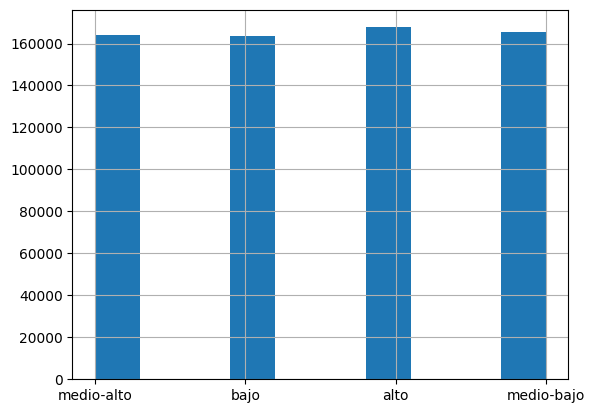

In [ ]:
z.RENDIMIENTO_GLOBAL.hist()

# Conversión de la variable objetivo a valores numéricos discretos

Se convierte la columna de predicción `RENDIMIENTO_GLOBAL` de categorías ordinales a valores numéricos para facilitar el modelado.

In [ ]:
y_col = 'RENDIMIENTO_GLOBAL'

rmap = {'alto': 3, 'bajo':0, 'medio-bajo':1, 'medio-alto':2}
z[y_col] = z[y_col].replace(rmap)
z.head()

<ipython-input-96-4f00fef8d378>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z[y_col] = z[y_col].replace(rmap)


,ID,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,FAMI_TIENECOMPUTADOR,...,DEP_QUINDIO,DEP_RISARALDA,DEP_SANTANDER,DEP_SAN_ANDRES,DEP_SUCRE,DEP_TOLIMA,DEP_VALLE,DEP_VAUPES,PAGOMATRICULAPROPIO_No,PAGOMATRICULAPROPIO_Si
0,904256,6.0,1,3.0,1.0,1.0,Si,Si,N,Si,...,False,False,False,False,False,False,False,False,True,False
1,645256,4.0,0,3.0,0.0,1.0,Si,No,N,Si,...,False,False,False,False,False,False,False,False,True,False
2,308367,4.0,4,3.0,1.0,1.0,Si,No,N,No,...,False,False,False,False,False,False,False,False,True,False
3,470353,5.0,0,4.0,1.0,1.0,Si,No,N,Si,...,False,False,True,False,False,False,False,False,True,False
4,989032,4.0,3,3.0,1.0,0.0,Si,Si,N,Si,...,False,False,False,False,False,False,False,False,True,False


# Análisis de tipos de datos en el dataframe

Se cuenta la cantidad de columnas por tipo de dato para entender la estructura del dataset.

In [ ]:
z.dtypes.value_counts()

,count
bool,308
float64,9
object,5
int64,2
Int64,1


# Preprocesamiento y Selección de Características

El preprocesamiento de datos suele incluir:

- **Normalización:** Escala las características para que estén entre 0 y 1.  
  Fórmula:  
 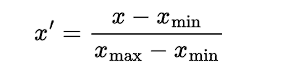
- **Estandarización:** Ajusta las características para que tengan media 0 y desviación estándar 1.  
  Fórmula:  
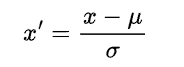
---

## Selección de Características

### Selección por Varianza

Se eliminan características con varianza menor a un umbral \(\theta\):

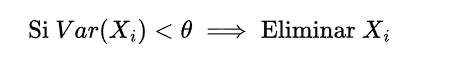
### Selección por Correlación

Se calcula la matriz de correlación \(\mathbf{R}\) para identificar variables redundantes:

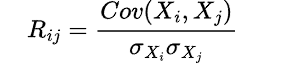

Variables con alta correlación pueden ser removidas para evitar multicolinealidad.

### Selección basada en Importancia de Modelo

Con modelos como Random Forest o XGBoost, se calcula la importancia de cada característica, generalmente basada en la reducción de impureza o ganancia:

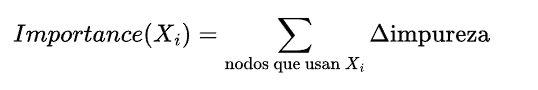

### Eliminación Recursiva de Características (RFE)

RFE elimina iterativamente las características menos importantes según un estimador base (p.ej., regresión logística) hasta seleccionar \(k\) características:

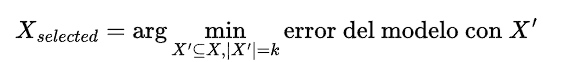

---

### Código de ejemplo

```python
from sklearn.feature_selection import VarianceThreshold, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Selección por Varianza
selector = VarianceThreshold(threshold=0.1)
X_selected_var = selector.fit_transform(X)

# Selección por Correlación
corr_matrix = np.corrcoef(X.T)
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Importancia con Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
importances = rf.feature_importances_
sorted_idx = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[sorted_idx])
plt.xticks(range(X.shape[1]), df.columns[sorted_idx], rotation=90)
plt.show()

# Importancia con XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
plot_importance(xgb)
plt.show()

# RFE
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X_train, y_train)
X_selected_rfe = rfe.transform(X_train)
